In [59]:
# show portion content of  the file
!head -n 10 cities.csv

New York
London
Paris
Zurich
Cairo
Buenos Aires
Moscow
Nairobi

In [60]:

# show and print notification of file content length with nice format
!wc -l cities.csv | awk '{print "Number of lines in the file: " $1}'



Number of lines in the file: 7


In [72]:
!pip install requests

In [73]:
# Dependencies
import requests as req
import json
import csv

# OpenWeather API Key
api_key = "417bfe8effcb6b9aa355a4de24d62458"

# Specify File Path
csvpath = "cities.csv"

# Build an endpoint URL to the OpenWeatherMap Service
url = "http://api.openweathermap.org/data/2.5/weather?"

# Open output file
output_file = "output.csv"
with open(output_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature])



New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.25, 'feels_like': 42.42, 'temp_min': 45.12, 'temp_max': 51.51, 'pressure': 1020, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 360, 'gust': 23.02}, 'clouds': {'all': 0}, 'dt': 1678382860, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunset': 1678402529}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}
48.25
---------------
London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.4, 'feels_like': 49.46, 'temp_min': 44.35, 'temp_max': 52.27, 'pressure': 986, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 180, 'gust': 20.71}, 'clouds': {'all': 75}, 'dt': 1678382803, 'sys': {'type': 2, 'id': 207553

In [74]:
# make the output file readable
!cat output.csv


New York,48.25
London,50.4
Paris,55.72
Zurich,56.3
Cairo,74.16
Buenos Aires,86.7
Moscow,22.48
Nairobi,76.66


In [64]:
# create a new output_full file that contains all the data features
output_full_file = "output_full.csv"
with open(output_full_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature, humidity, cloudiness, wind_speed, latitude, longitude])

# make the output_full file readable
!cat output_full.csv


New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.3, 'feels_like': 41.2, 'temp_min': 43.95, 'temp_max': 50.61, 'pressure': 1020, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 350, 'gust': 20.71}, 'clouds': {'all': 0}, 'dt': 1678380928, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunset': 1678402529}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}
47.3
---------------
London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.52, 'feels_like': 49.6, 'temp_min': 44.35, 'temp_max': 52.27, 'pressure': 987, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1678380856, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB'

In [65]:
# add a row header to the output_full file
import pandas as pd
df = pd.read_csv("output_full.csv", header=None)
df.columns = ["City", "Temperature (F)", "Humidity", "Cloudiness", "Wind Speed", "Latitude", "Longitude"]
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv

City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude
New York,47.3,49,0,14.97,40.7143,-74.006
London,50.52,92,75,6.91,51.5085,-0.1257
Paris,57.13,82,100,16.11,48.8534,2.3488
Zurich,56.75,40,40,6.91,47.3667,8.55
Cairo,75.96,22,0,9.22,30.0626,31.2497
Buenos Aires,85.03,61,20,13.8,-34.6132,-58.3772
Moscow,23.25,98,100,3.69,55.7522,37.6156
Nairobi,79.14,34,20,17.27,-1.2833,36.8167


In [66]:
# create a fucntion to convert the temperature from Fahrenheit to Celsius and add a new column next to temperature (F) for Temperature (C) and use 2 decimal places
def fahrenheit_to_celsius(fahrenheit):
    return round((fahrenheit - 32) * 5/9, 2)

df["Temperature (C)"] = df["Temperature (F)"].apply(fahrenheit_to_celsius)
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv




City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Temperature (C)
New York,47.3,49,0,14.97,40.7143,-74.006,8.5
London,50.52,92,75,6.91,51.5085,-0.1257,10.29
Paris,57.13,82,100,16.11,48.8534,2.3488,13.96
Zurich,56.75,40,40,6.91,47.3667,8.55,13.75
Cairo,75.96,22,0,9.22,30.0626,31.2497,24.42
Buenos Aires,85.03,61,20,13.8,-34.6132,-58.3772,29.46
Moscow,23.25,98,100,3.69,55.7522,37.6156,-4.86
Nairobi,79.14,34,20,17.27,-1.2833,36.8167,26.19


In [67]:
# open the output file, add a row header with the column names, and save the file take in account that the expected number row is 7 and the new number of rows will be 8

# import pandas as pd
# df = pd.read_csv("output_full.csv", header=None)
# df.columns = ["City", "Temperature (F)", "Humidity", "Cloudiness", "Wind Speed", "Latitude", "Longitude", "Temperature (C)"]
# df.to_csv("output_full.csv", index=False)

# # make the output_full file readable
# !cat output_full.csv

# create a new output_full file that contains all the data features
output_full_file = "output_full.csv"
with open(output_full_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature, humidity, cloudiness, wind_speed, latitude, longitude])



New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.3, 'feels_like': 41.2, 'temp_min': 43.95, 'temp_max': 50.61, 'pressure': 1020, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 350, 'gust': 20.71}, 'clouds': {'all': 0}, 'dt': 1678380928, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 'sunset': 1678402529}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}
47.3
---------------
London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.52, 'feels_like': 49.6, 'temp_min': 44.35, 'temp_max': 52.27, 'pressure': 987, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1678380856, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB'

In [68]:
# install the citipy package
!pip install citipy

In [69]:
# Citypy library to find the nearest city to the coordinates of the cities in the csv file 
from citipy import citipy

# create a list to store the nearest cities
nearest_cities = []

# iterate through the cities in the csv file
for index, row in df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    nearest_cities.append(city.city_name)

# add the nearest cities to the dataframe
df["Nearest City"] = nearest_cities
df.to_csv("output_full.csv", index=False)

# make the output_full file readable
!cat output_full.csv

# create a new output_full file that contains all the data features
output_full_file = "output_full.csv"
with open(output_full_file, "w") as csvfile:
    # Initialize the csv.writer
    csvwriter = csv.writer(csvfile, delimiter=",")

    # Read CSV
    with open(csvpath) as csvfile:

        # Read the file specifying commas as delimiters
        csvreader = csv.reader(csvfile)

        # Iterate through each row of the CSV
        for row in csvreader:

            # Retrieve the city name from the CSV file
            city = row[0]

            # Print each row of the csv
            print(city)

            # Build the query URL for the OpenWeatherMap Service
            query_url = url + "q=" + city + "&appid=" + api_key + "&units=Imperial"

            # Make a request to the OpenWeatherMap Service
            weather_response = req.get(query_url)
            weather_json = weather_response.json()

            # Print the JSON for each
            print(weather_json)

            # Extract the temperature for each city
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]

            # Print the Temperatures
            print(temperature)

            # Draw a separating line
            print("---------------")

            # Write the contents for each to the output CSV
            csvwriter.writerow([city, temperature, humidity, cloudiness, wind_speed, latitude, longitude])

# make the output_full file readable
!cat output_full.csv



City,Temperature (F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Temperature (C),Nearest City
New York,47.3,49,0,14.97,40.7143,-74.006,8.5,new york
London,50.52,92,75,6.91,51.5085,-0.1257,10.29,london
Paris,57.13,82,100,16.11,48.8534,2.3488,13.96,paris
Zurich,56.75,40,40,6.91,47.3667,8.55,13.75,zurich
Cairo,75.96,22,0,9.22,30.0626,31.2497,24.42,cairo
Buenos Aires,85.03,61,20,13.8,-34.6132,-58.3772,29.46,san vicente
Moscow,23.25,98,100,3.69,55.7522,37.6156,-4.86,moscow
Nairobi,79.14,34,20,17.27,-1.2833,36.8167,26.19,nairobi
New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.3, 'feels_like': 41.2, 'temp_min': 43.95, 'temp_max': 50.61, 'pressure': 1020, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 350, 'gust': 20.71}, 'clouds': {'all': 0}, 'dt': 1678380928, 'sys': {'type': 2, 'id': 2039034, 'country': 'US', 'sunrise': 1678360680, 's

In [70]:
# install seaborn
!pip install seaborn

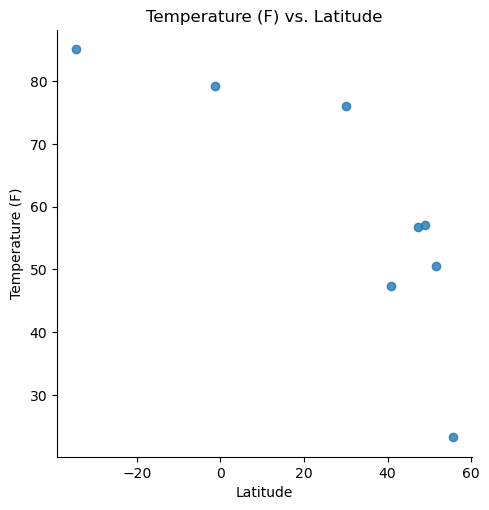

In [71]:
# create a scatter plot of temperature (F) vs. latitude
import seaborn as sns   
sns.lmplot(x="Latitude", y="Temperature (F)", data=df, fit_reg=False)
plt.title("Temperature (F) vs. Latitude")
plt.show()

